# DTEK0042 Exercise 2
    Group Members:
    1. Patrik Vahala
    2. Giulia Parisi
    3. Fairuz Bhuiyan

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft
from scipy import fftpack



# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

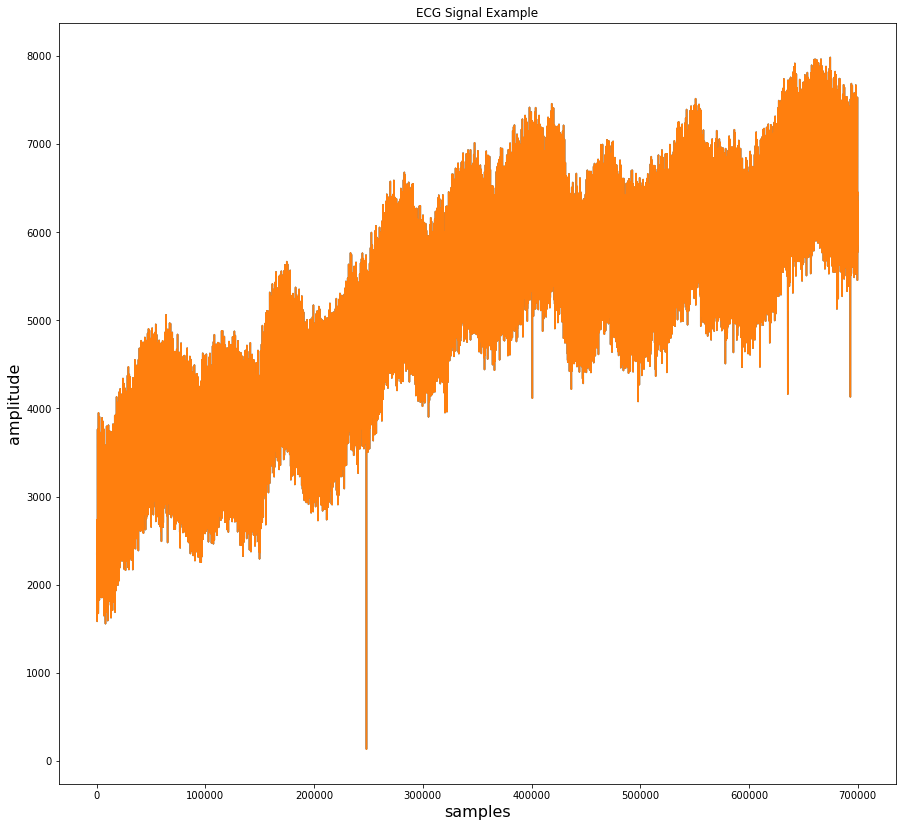

In [2]:
ECG_sig = np.loadtxt('ECG_800hz.txt')
Fs=800


plt.figure(figsize=(15,14))
plt.plot(ECG_sig)
plt.title("ECG Signal Example")
plt.xlabel("samples",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.plot(ECG_sig)
plt.show()

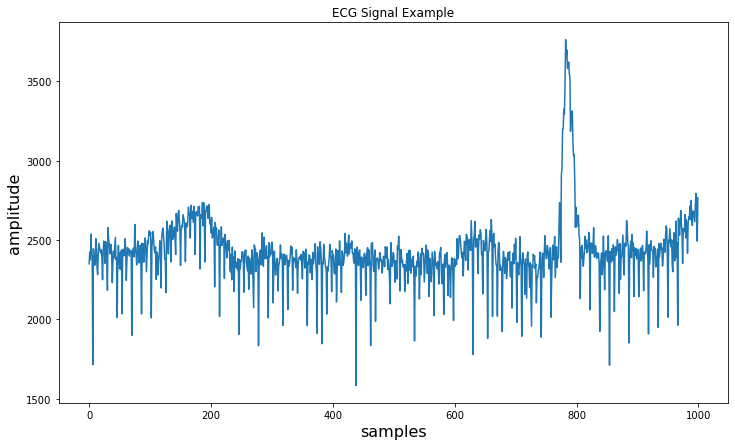

In [3]:
plt.figure(figsize=(12,7))
plt.plot(ECG_sig[0:1000])
plt.title("ECG Signal Example")
plt.xlabel("samples",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.show()

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. 
 - Take only the positive frequencies from the computed DFT and 
 - subsequently calculate the magnitude (absolute value) of frequency content. 
 - Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and 
 - replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

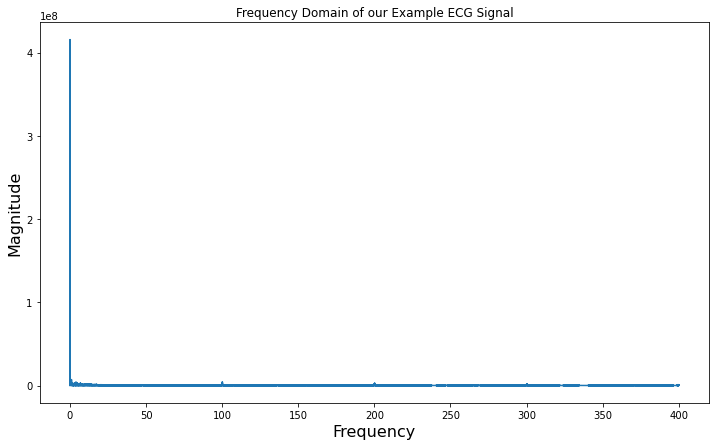

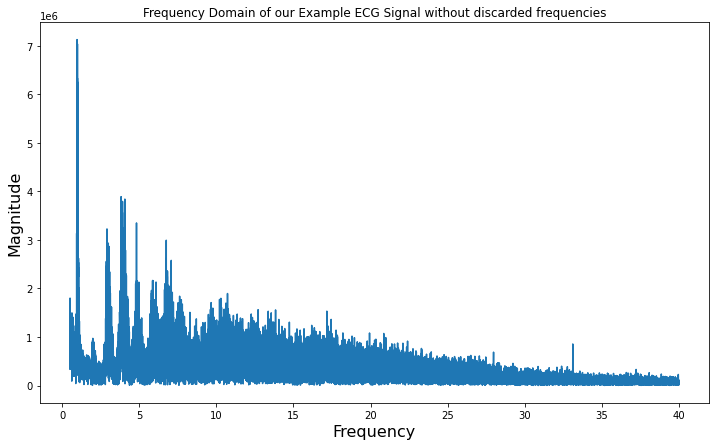

In [4]:
from scipy import fftpack
Fs = 800
sig_len=len(ECG_sig)
no_mean = ECG_sig - np.mean(ECG_sig)


fx = np.fft.rfftfreq(len(no_mean),1/Fs) #frequency, DFT only positives
fy = np.abs(np.fft.rfft(no_mean, axis=0)) #magnitude, "absolute value"

discarded = np.where((0.5 <= fx) & (fx <= 40))

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of our Example ECG Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(fx,fy)
plt.show()

plt.figure(figsize=(12,7))
plt.title("Frequency Domain of our Example ECG Signal without discarded frequencies")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(fx[discarded],fy[discarded])
plt.show()

# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three(???????) functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. Freqs is analog, freqz is digital.

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

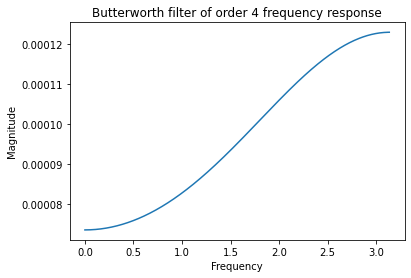

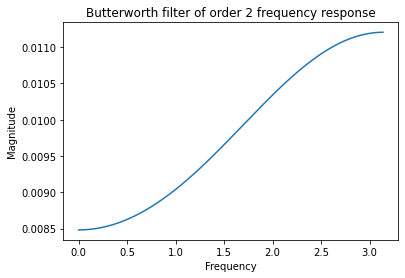

In [5]:
import scipy.signal
from scipy.signal import butter
def butterworth_bandpass( lowcut, highcut, order):
    nyq = 0.5 * 800 #nyquist
    low = lowcut / nyq
    high = highcut / nyq
    #numerator (b) and denominator (a)
    b,a = sp.signal.butter(order,[low,high],'bandpass', 800) #order, critical frequency, type of filter, sampling frequency
    return b,a

#Butterworth filter of order 4
b1 = butterworth_bandpass(0.5,40,4) #lowcut, Highcut, Order
h1, w1 = sp.signal.freqz(b1[0],b1[1],plot=lambda w1, h1: plt.plot(w1, np.abs(h1)))
plt.title("Butterworth filter of order 4 frequency response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

#Butterworth filter of order 2
b2 = butterworth_bandpass(0.5,40,2) #lowcut, Highcut, Order
h2, w2 = sp.signal.freqz(b2[0],b2[1],plot=lambda w2,h2: plt.plot(w2,np.abs(h2)))
plt.title("Butterworth filter of order 2 frequency response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

## Observations:

In the filter of order 4 figure is steeper, which means that more frequencies are being filtered out. 

As with the second-order filter, the fourth-order high pass filter is formed by interchanging the positions of the frequency determining components (resistors and capacitors) in the equivalent low pass filter. 

The higher the Butterworth filter order, the higher the number of cascaded stages there are within the filter design, and the closer the filter becomes to the ideal “brick wall” response.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

Text(0.5, 0, 'Samples')

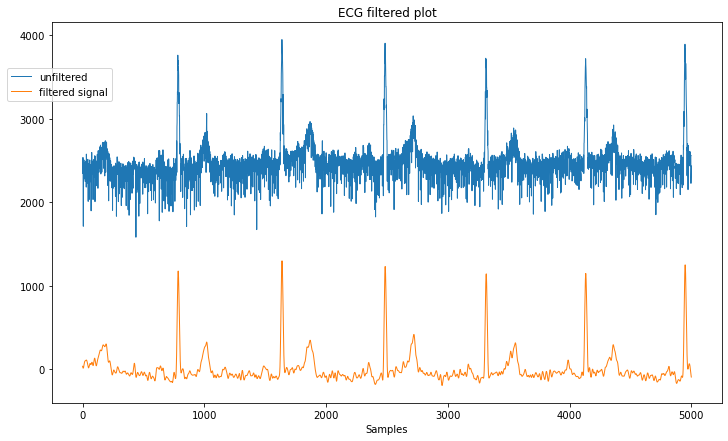

In [6]:
nyq = 800/2
low = 0.5 / nyq
high = 40 / nyq
b,a = sp.signal.butter(4, [low,high], 'bandpass') #with the frequenzy of 800 the lower graph wont show correctly.

filtered_signal = scipy.signal.filtfilt(b, a, ECG_sig)
    

fig = plt.figure(figsize=(12,7))
plt.plot(ECG_sig[:5000], label="unfiltered", linewidth=1)
plt.plot(filtered_signal[:5000], label="filtered signal", linewidth=1)
fig.legend(bbox_to_anchor=(0.20,0.8))
plt.title("ECG filtered plot")
plt.xlabel("Samples")

## Observations:

Filtering enhances the visibility of the signal peaks and removes most of the noise. It also suppresses unwanted components or features from a signal. 

High-pass filtering is effective in reducing ECG contamination from integrated EMGs when the appropriate cut-off frequency is used. It also has the ability to roll off gain after the bandwidth at a sharper rate than low-order filters.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

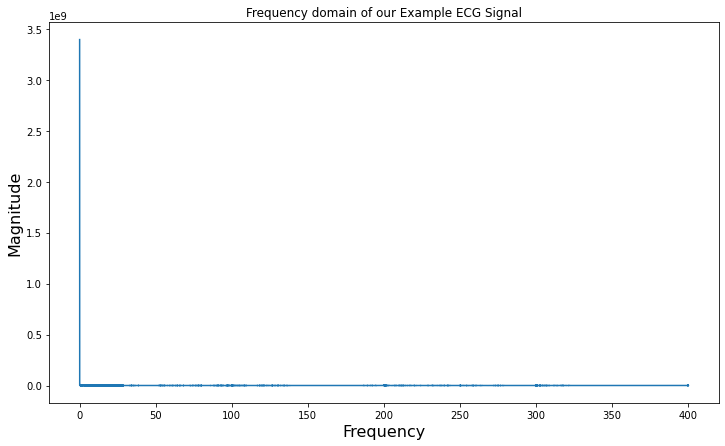

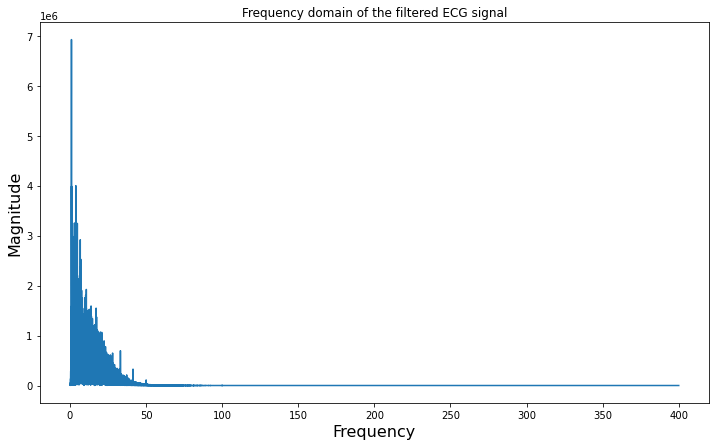

In [7]:
fy1 = np.abs(np.fft.rfft(ECG_sig,axis=0)) #Frequency, difference from the DFT before: mean is not removed!
fx1 = np.fft.rfftfreq(sig_len,d=1.0/Fs) #Magnitude, absolute value, discrete fourier transform, only positive frequencies

plt.figure(figsize=(12,7))
plt.title("Frequency domain of our Example ECG Signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(fx1, fy1)
plt.show()

fy2 = np.abs(np.fft.rfft(filtered_signal,axis=0))#Frequency, difference from the DFT before: mean is not removed!
fx2 = np.fft.rfftfreq(len(filtered_signal),d=1.0/Fs) #Magnitude, absolute value, discrete fourier transform, only positive freq

plt.figure(figsize=(12,7))
plt.title("Frequency domain of the filtered ECG signal")
plt.xlabel("Frequency",fontsize=16)
plt.ylabel("Magnitude",fontsize=16)
plt.plot(fx2,fy2)
plt.show()


## Observations:

In the plot of the filtered signal, the frequencies are all packed in the left corner, where frequencies are mostly under 50Hz. This is the effect of the filtering. The higher the frequency; the lower the magnitude.

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


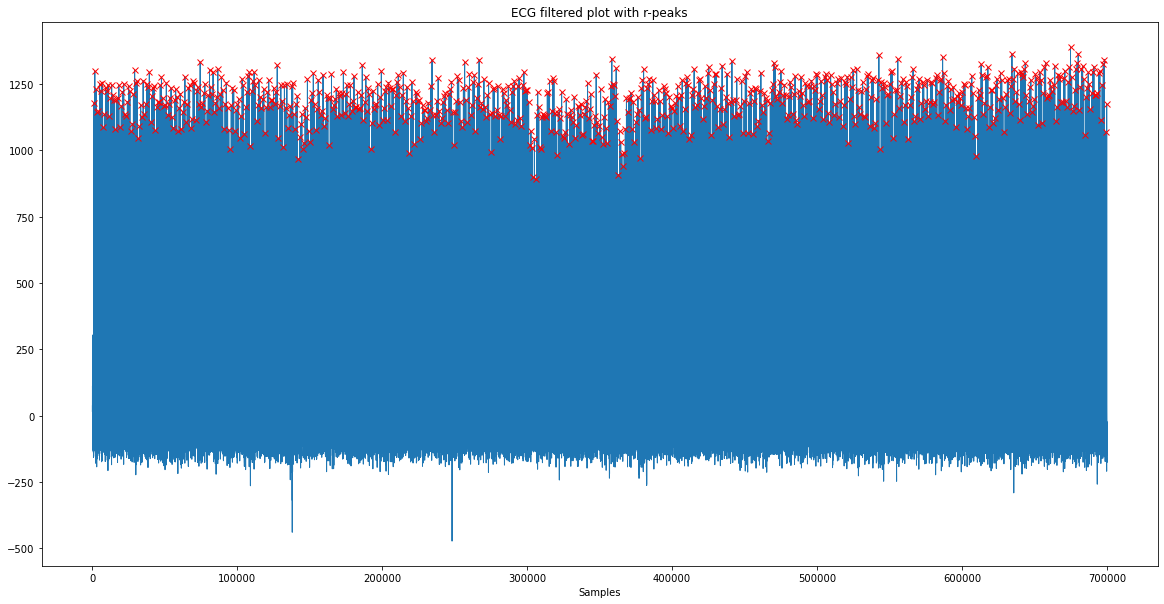

In [8]:
#still need to locally install biosppy
#code
#!pip install biosppy
import biosppy 
from biosppy.signals import ecg 

r_peaks = biosppy.signals.ecg.hamilton_segmenter(filtered_signal, Fs)

#plot red x's where the top 3 peaks are
fig = plt.figure(figsize=(20,10))
plt.plot(filtered_signal, label="filtered signal", linewidth=1)
plt.title("ECG filtered plot with r-peaks")
plt.xlabel("Samples")
plt.plot(r_peaks['rpeaks'],filtered_signal[r_peaks],"rx")
plt.show()

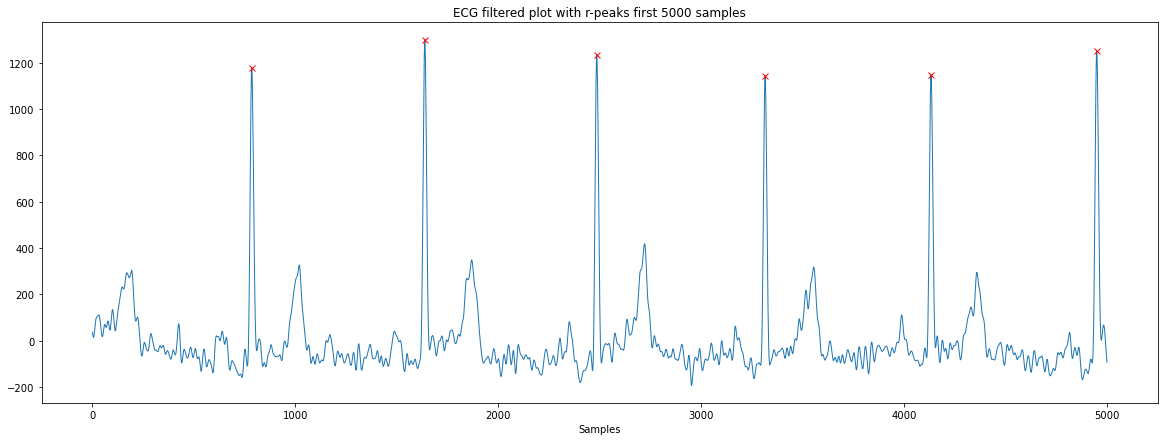

In [9]:


r_peaks2 = biosppy.signals.ecg.hamilton_segmenter(filtered_signal[:5000], Fs) #first 5000 samples!

fig = plt.figure(figsize=(20,7))
plt.plot(filtered_signal[:5000], label="filtered signal", linewidth=1)
plt.title("ECG filtered plot with r-peaks first 5000 samples")
plt.xlabel("Samples")
plt.plot(r_peaks2['rpeaks'],filtered_signal[r_peaks2],"rx")
plt.show()

## Observations:

As we can see, taking a closer look at the first 5000 samples the r-peaks are quite frequent. Noise peaks have stronger amplitude than real R-peaks and they seem to occur at constant frequency. They are likely electrode motion artifacts that can be produced e.g. during running, when mechanical forces act on electrodes as a frequent manner.
